# Solving 1D Schrödinger Equation Numerically
This notebook solves the eigenvalue problem for the one-dimensional Schrödinger equation using numerical methods. Below is a detailed explanation and implementation:

## Schrödinger Equation
The time-independent Schrödinger equation in one dimension is given by:

$$ -\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x) \psi(x) = E \psi(x) $$

Rewriting it:

$$ \psi''(x) + \frac{2m}{\hbar^2} \left[ E - V(x) \right] \psi(x) = 0 $$

where:
- $\psi(x)$ is the wavefunction,
- $V(x)$ is the potential,
- $E$ is the energy eigenvalue,
- $m$ is the mass of the particle,
- $\hbar$ is the reduced Planck constant.

The potential $V(x)$ is provided as:

$$ V(x) = \frac{\hbar^2}{2m} \alpha^2 \lambda (\lambda - 1) \left( \frac{1}{2} - \frac{1}{\cosh^2(\alpha x)} \right) $$

For this problem, we use $\hbar = m = 1$, $\alpha = 1$, and $\lambda = 4$.







## Implementation Steps
1. Define the potential function $V(x)$.
2. Use the Numerov method to integrate the wavefunction $\psi(x)$.
3. Normalize the wavefunction.
4. Match the wavefunction from both sides of the potential.
5. Solve for eigenvalues using a root-finding method.
6. Compare numerical results with exact eigenvalues.

### Code Implementation

In [25]:
# Constants and Parameters
hbar = 1  # Planck constant
m = 1     # Particle mass
alpha = 1 # alpha parameter
lambda_val = 4 # lambda parameter

# Potential Function
def V(x):
    """ Potential V(x) as given in the problem """
    coeff = (hbar**2 / (2 * m)) * alpha**2 * lambda_val * (lambda_val - 1)
    return coeff * (0.5 - 1 / (np.cosh(alpha * x)**2))

### Numerov Method
The Numerov method is used to integrate the wavefunction:

$$ \psi_{i+1} = \frac{2(1 - \frac{5h^2k_i}{12})\psi_i - (1 + \frac{h^2k_{i-1}}{12})\psi_{i-1}}{1 + \frac{h^2k_{i+1}}{12}} $$

where:

$$ k(x) = \frac{2m}{\hbar^2} [E - V(x)] $$

In [26]:
def numerov(psi0, psi1, E, x, h):
    """ Numerov method to integrate wavefunction for a given energy E. """
    N = len(x)
    psi = np.zeros(N)
    psi[0], psi[1] = psi0, psi1

    f = lambda xi: 2 * m / hbar**2 * (E - V(xi))

    for i in range(1, N - 1):
        k0 = f(x[i - 1])
        k1 = f(x[i])
        k2 = f(x[i + 1])

        psi[i + 1] = (2 * (1 - 5 * h**2 * k1 / 12) * psi[i] - (1 + h**2 * k0 / 12) * psi[i - 1]) / (1 + h**2 * k2 / 12)

    return psi

### Normalization
To ensure the wavefunction satisfies $\int |\psi(x)|^2 dx = 1$, we normalize it numerically.

In [27]:
def normalize(psi, x):
    """ Normalize the wavefunction psi over x. """
    dx = x[1] - x[0]
    return psi / np.sqrt(np.sum(psi**2) * dx)

### Matching Condition
Eigenvalues are found by matching the left and right wavefunctions at a turning point $ x_\text{match}$:

$$ \frac{\psi_L'(x_\text{match})}{\psi_L(x_\text{match})} = \frac{\psi_R'(x_\text{match})}{\psi_R(x_\text{match})} $$

This is approximated using finite differences.

In [28]:
def matching_condition(E, x, h):
    """ Compute the matching condition at the turning point. """
    N = len(x)

    # Integrate from left
    psi_left = numerov(0.0, 1e-5, E, x, h)

    # Integrate from right
    psi_right = numerov(0.0, 1e-5, E, x[::-1], h)[::-1]

    # Match at the midpoint
    x_match = N // 2
    ratio_left = (psi_left[x_match + 1] - psi_left[x_match - 1]) / (2 * h * psi_left[x_match])
    ratio_right = (psi_right[x_match + 1] - psi_right[x_match - 1]) / (2 * h * psi_right[x_match])

    return ratio_left - ratio_right

### Root-Finding for Eigenvalues
We use the Brent's method to find roots of the matching condition function $f(E)$.


In [29]:
def find_eigenvalues(x, h, n_levels=3):
    """ Find the first n_levels eigenvalues using root-finding. """
    eigenvalues = []

    # Scan energy range dynamically
    energies = np.linspace(-10, 10, 1000)

    for i in range(len(energies) - 1):
        E1, E2 = energies[i], energies[i + 1]

        if matching_condition(E1, x, h) * matching_condition(E2, x, h) < 0:
            result = root_scalar(matching_condition, args=(x, h), bracket=[E1, E2], method='brentq')
            eigenvalues.append(result.root)

            if len(eigenvalues) >= n_levels:
                break

    return eigenvalues

### Results and Plot
Numerical eigenvalues are compared with exact values, and the wavefunctions are plotted.

Numerical Eigenvalues:
E_0 = -1.500001
E_1 = 0.999998
E_2 = 2.499998

Exact Eigenvalues:
E_0 = -1.500000
E_1 = 1.000000
E_2 = 2.500000

Relative Errors:
Error for E_0: 0.00%
Error for E_1: 0.00%
Error for E_2: 0.00%


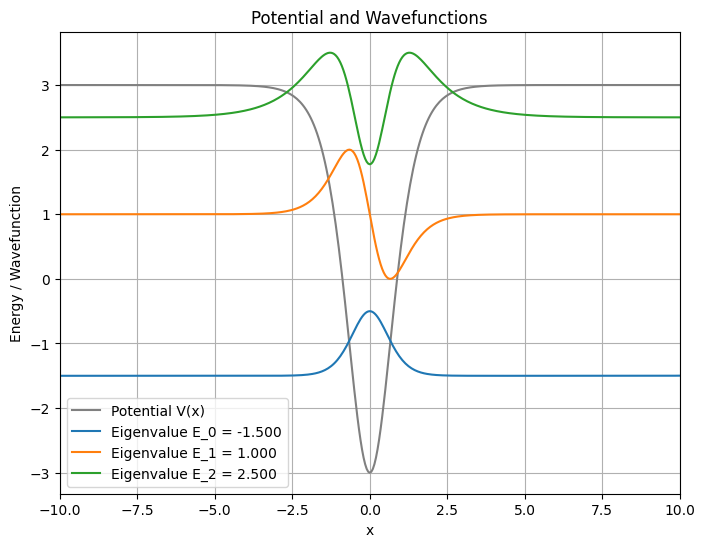

In [30]:
if __name__ == "__main__":
    x_min, x_max = -10, 10  # Range for x
    h = 0.05                # Step size
    x = np.arange(x_min, x_max + h, h)

    # Find the first 3 eigenvalues
    n_levels = 3
    eigenvalues = find_eigenvalues(x, h, n_levels=n_levels)

    # Print results
    print("Numerical Eigenvalues:")
    for i, E in enumerate(eigenvalues):
        print(f"E_{i} = {E:.6f}")

    # Exact Eigenvalues for Comparison
    exact_eigenvalues = [(hbar**2 / (2 * m)) * alpha**2 * (lambda_val * (lambda_val - 1) / 2 - (lambda_val - 1 - n)**2) for n in range(n_levels)]
    print("\nExact Eigenvalues:")
    for i, E in enumerate(exact_eigenvalues):
        print(f"E_{i} = {E:.6f}")

    # Relative Errors
    errors = [abs((num - exact) / exact) if exact != 0 else 0 for num, exact in zip(eigenvalues, exact_eigenvalues)]
    print("\nRelative Errors:")
    for i, err in enumerate(errors):
        print(f"Error for E_{i}: {err:.2%}")

    # Plot Potential and Wavefunctions
    plt.figure(figsize=(8, 6))
    plt.plot(x, V(x), label="Potential V(x)", color='grey')

    for i, E in enumerate(eigenvalues):
        psi = numerov(0.0, 1e-5, E, x, h)
        psi = normalize(psi, x)
        plt.plot(x, psi / np.max(np.abs(psi)) + E, label=f"Eigenvalue E_{i} = {E:.3f}")

    plt.xlabel("x")
    plt.ylabel("Energy / Wavefunction")
    plt.xlim(x[0], x[-1])
    plt.title("Potential and Wavefunctions")
    plt.legend()
    plt.grid()
    plt.show()